# Financial Regression Analysis

In this assignment our job is to find the best Multiple Linear Regression algorithm to predict the dependent variable MKT. Also we have to check for multicollinearity in the dataset and drop the responsible variables. 

In [23]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [6]:
# Loading the data
data = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets for ML\\Regression\\Financial analysis Regression.xlsx')
data.head()



,Dates,MF,SMB5,HML,RMW,CMA,WML,RF,MKT
0,2004-10-31,101.446400,100.354200,97.841700,102.257900,96.783700,102.785500,100.387700,101.834100
1,2004-11-30,111.414754,106.534864,105.178536,105.167639,99.874608,103.105295,102.278199,111.858751
2,2004-12-31,121.991140,117.422493,115.928284,112.852392,112.678340,107.825124,112.403055,122.535557
3,2005-01-31,120.595329,124.347000,120.726074,125.064690,120.920415,126.403882,123.029620,121.089392
4,2005-02-28,125.340598,125.947498,125.315533,120.335247,120.266468,124.285062,121.597362,125.848568


In [7]:
#dropping unnecessary columns
data=data.drop(['Dates'],axis=1)

In [8]:
#examining dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MF      228 non-null    float64
 1   SMB5    228 non-null    float64
 2   HML     228 non-null    float64
 3   RMW     228 non-null    float64
 4   CMA     228 non-null    float64
 5   WML     228 non-null    float64
 6   RF      228 non-null    float64
 7   MKT     228 non-null    float64
dtypes: float64(8)
memory usage: 14.4 KB


In [11]:
#splitting the dataset
X = data.drop('MKT', axis=1)  
y = data['MKT']


In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Checking for multicollinearity using VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data


In [16]:
# Excluding the dependent variable from VIF calculation
vif_data = calculate_vif(X_train)
print("VIF:")
print(vif_data)

VIF:
  Variable          VIF
0       MF   652.084803
1     SMB5   886.967150
2      HML  2433.882103
3      RMW  1058.752923
4      CMA  2964.989412
5      WML   941.793820
6       RF  7914.419164


*Comment:
There is high multicollinearity among the variables hence a correlation plot is needed to identify the ones responsible.* 

In [18]:
# Building a feature matrix
correlation_matrix = X.corr()
correlation_matrix

,MF,SMB5,HML,RMW,CMA,WML,RF
MF,1.000000,0.996615,0.997558,0.993748,0.995987,0.994773,0.996995
SMB5,0.996615,1.000000,0.998244,0.994922,0.997454,0.996337,0.998150
HML,0.997558,0.998244,1.000000,0.995651,0.998848,0.996787,0.999000
RMW,0.993748,0.994922,0.995651,1.000000,0.996902,0.997790,0.997997
CMA,0.995987,0.997454,0.998848,0.996902,1.000000,0.997642,0.999447
WML,0.994773,0.996337,0.996787,0.997790,0.997642,1.000000,0.998295
RF,0.996995,0.998150,0.999000,0.997997,0.999447,0.998295,1.000000


In [19]:
# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
elastic_net_model = ElasticNet()
svr_model = SVR()
rf_model = RandomForestRegressor()

In [20]:
# List of models
models = [linear_model, ridge_model, lasso_model, elastic_net_model, svr_model, rf_model]


In [21]:
# Iterate through models and evaluate MSE
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_name = type(model).__name__
    print(f"{model_name} Mean Squared Error: {mse}")

LinearRegression Mean Squared Error: 1.3808772334733572
Ridge Mean Squared Error: 1.3808948901963218
Lasso Mean Squared Error: 1.481320896548156
ElasticNet Mean Squared Error: 1.4809496756550669
SVR Mean Squared Error: 373299.6261654502
RandomForestRegressor Mean Squared Error: 843.0668650792112


**Observation**

Considering both the R-squared values and mean squared errors, the linear models (Linear Regression, Ridge, Lasso, ElasticNet) perform well in terms of predictive accuracy and generalization to unseen data. The mean squared error for Linear Regression is slightly lower than the regularized models, making it the preferred choice for this dataset.

In [24]:
# Iterate through models and evaluate R-squared
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    model_name = type(model).__name__
    print(f"{model_name} R-squared: {r_squared}")

LinearRegression R-squared: 0.9999954782806523
Ridge R-squared: 0.9999954782228349
Lasso R-squared: 0.9999951493751973
ElasticNet R-squared: 0.99999515059077
SVR R-squared: -0.22237958684380943
RandomForestRegressor R-squared: 0.9971039141514757


**Observation**

Based on the R-squared values, all the linear models (Linear Regression, Ridge, Lasso, ElasticNet) perform exceptionally well, with R-squared values very close to 1. The SVR model, however, exhibits a negative R-squared, indicating poor performance.

Considering the high R-squared values and simplicity, we recommend choosing the Linear Regression model for this dataset. It provides an excellent fit and is easier to interpret compared to the regularized models. 

In [26]:
# Initialize the Linear Regression model
linear_model = LinearRegression()



In [27]:

# Fit the model on the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Predict on the test data
y_pred1 = linear_model.predict(X_test)


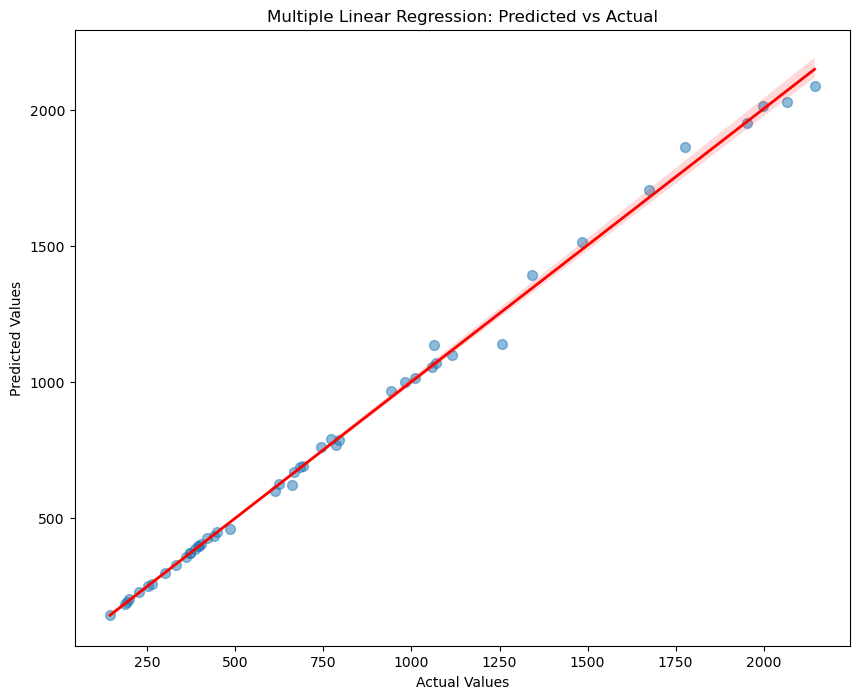

In [29]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

*Remarks:The image you sent is a line graph of predicted vs actual values. The red line represents the predicted values, while the blue line represents the actual values.
The graph shows that the predicted values are generally close to the actual values, but there are some outliers, particularly at the lower end of the range. This suggests that the model is able to predict the values accurately for most cases, but it struggles to predict values for cases outside of its training data.*